In [28]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq, rfftfreq
from datetime import datetime

In [29]:

f=open("/Users/jasonbane/Documents/CAENGECO2020.log")

Data_list=[]
for line in f.readlines():  
    newstr=line.replace("[","")
    newstr=newstr.replace("]","")
    newstr=newstr.replace(";","")
    info_A=newstr.split()
    Data={}

    Timeinfo = info_A[0]
    Timeinfo= Timeinfo.replace("T"," ")
    Timeinfo= Timeinfo[:-1]

    date_format = '%Y-%m-%dT%H:%M:%S:'
    #data_obj = datetime.strptime(Timeinfo,date_format)
    date=Timeinfo[:10]
    time=Timeinfo[11:]
    
    #Data["Timestamp"] = data_obj
    Data["Timestamp"] = Timeinfo
    Data["Date"]=date
    Data["Time"]=time
    Data["NimBin"] = info_A[3]
    Data["CH"] = info_A[5]
    Data["par"]= info_A[7]
    Data["Val"]= info_A[9]
    Data_list.append(Data)
DF=pd.DataFrame.from_dict(Data_list)

In [30]:
DF.query('par != "ChStatus" and par != "IMonL" and par != "VMon"')

,Timestamp,Date,Time,NimBin,CH,par,Val
5064,2024-04-30 11:53:55,2024-04-30,11:53:55,0,3,IMonH,0.2
5068,2024-04-30 11:53:56,2024-04-30,11:53:56,0,3,IMonH,0.05
5076,2024-04-30 11:53:58,2024-04-30,11:53:58,0,3,IMonH,0.1
5090,2024-04-30 11:54:03,2024-04-30,11:54:03,0,3,IMonH,0.15
5094,2024-04-30 11:54:05,2024-04-30,11:54:05,0,3,IMonH,0.4
...,...,...,...,...,...,...,...
5365,2024-04-30 12:04:14,2024-04-30,12:04:14,0,3,IMonH,0.75
5366,2024-04-30 12:04:15,2024-04-30,12:04:15,0,3,IMonH,0.7
5367,2024-04-30 12:04:16,2024-04-30,12:04:16,0,3,IMonH,0.75
5368,2024-04-30 12:04:17,2024-04-30,12:04:17,0,3,IMonH,0.7


In [31]:
names =["Ch 0 Status","Ch 0 Voltage","Ch 0 Current","Ch 1 Status","Ch 1 Voltage","Ch 1 Current","Ch 2 Status","Ch 2 Voltage","Ch 2 Current","Ch 3 Status","Ch 3 Voltage","Ch 3 Current" ]
keyword = ["ChStatus","VMon","IMonL","IMonH"]
channel=99


entry_list=[]
TS =[]
count=-1
for i,entry in enumerate(Data_list):
    entry_dict={}    
    
    channel = entry["CH"]
    par = entry["par"]
    par_num= keyword.index(par)


    


    if par == "IMonH": # Still current just new unit
        par_num =2
    col_num = int(channel)*3 + par_num
    ts = entry["Timestamp"]
    if ts in TS:
        # Saw timestep already
        # Only add new values to the dictonary    
        for j,name in enumerate(names):
            if j == col_num:
                entry_list[count][name] = entry['Val']
        

    else:
        
        # new timestep
        # Build all new dictionary with zeros used for placeholders
        count+=1
        entry_dict["Timestamp"]=ts
        entry_dict["Date"]=entry["Date"]
        entry_dict["Times"]=entry["Time"]
        

        TS.append(ts)
        for j,name in enumerate(names):
            if j == col_num:
                entry_dict[name] = entry['Val']
            else:
                if count ==0:
                    entry_dict[name] = 0
                else:
                    entry_dict[name] = entry_list[count-1][name]

        entry_list.append(entry_dict)



#names =["Ch 0 Status","Ch 0 Volatage","Ch 0 Current","Ch 1 Status","Ch 1 Volatage","Ch 1 Current","Ch 2 Status","Ch 2 Volatage","Ch 2 Current","Ch 3 Status","Ch 3 Volatage","Ch 3 Current" ]
newdf=pd.DataFrame.from_dict(entry_list)

newdf

#newdf["Timestamp"]
#newdf=newdf.set_index('Timestamp')
#newdf.index=pd.to_datetime(newdf.index)

#newdf
#newdf.resample("1s").max()






,Timestamp,Date,Times,Ch 0 Status,Ch 0 Voltage,Ch 0 Current,Ch 1 Status,Ch 1 Voltage,Ch 1 Current,Ch 2 Status,Ch 2 Voltage,Ch 2 Current,Ch 3 Status,Ch 3 Voltage,Ch 3 Current
0,2024-03-26 15:11:49,2024-03-26,15:11:49,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-03-26 15:11:51,2024-03-26,15:11:51,0,0,0,0,39.4,0.325,0,0,0,0,0,0
2,2024-03-26 15:11:52,2024-03-26,15:11:52,0,0,0,0,54.6,0.36,0,0,0,0,0,0
3,2024-03-26 15:11:53,2024-03-26,15:11:53,0,0,0,0,69.8,0.38,0,0,0,0,0,0
4,2024-03-26 15:11:54,2024-03-26,15:11:54,0,0,0,0,100.2,0.415,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,2024-05-17 11:46:54,2024-05-17,11:46:54,1,999.8,0.21,1024,0,0,0,0,0,1,200.4,0.005
11555,2024-05-17 11:46:55,2024-05-17,11:46:55,1,999.8,0.215,1024,0,0,0,0,0,1,200.4,0.005
11556,2024-05-17 11:47:01,2024-05-17,11:47:01,1,999.8,0.21,1024,0,0,0,0,0,1,200.4,0.005
11557,2024-05-17 11:47:02,2024-05-17,11:47:02,1,999.8,0.215,1024,0,0,0,0,0,1,200.4,0.005


<ErrorbarContainer object of 3 artists>

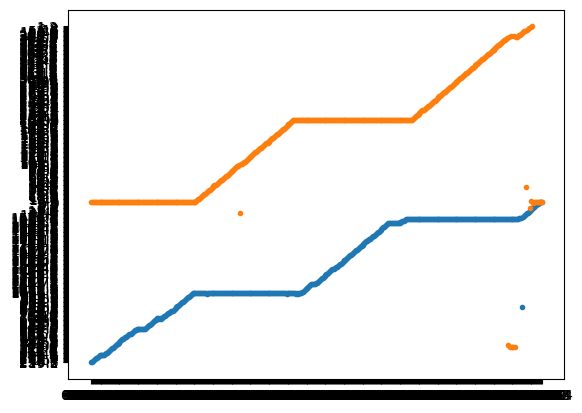

In [23]:
df= newdf.query("Date == '2024-05-17'")




plt.errorbar( x=df["Times"],y=df["Ch 0 Voltage"], fmt=".")
plt.errorbar( x=df["Times"],y=df["Ch 3 Voltage"], fmt=".")

In [27]:
df.groupby(df.index//5).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [3]:

Last_time=""
for entry in DF.iloc:
    Timestamp=entry["Timestamp"]
    TS_sep=Timestamp.split(sep="T")
    Date=TS_sep[0]
    Time=TS_sep[1]
    Time=Time[:-1]
    if 


    if int(Time[-1]) <3:
        Time=Time[:-1] + "0"
    elif int(Time[-1]) <7:
        Time=Time[:-1]+"5"
    else:
        Time=Time[:-1]+""
    
    print(Date,Time, entry["par"] )
    Last_time=Time

SyntaxError: invalid syntax (2037883296.py, line 8)

TypeError: unsupported operand type(s) for -: 'str' and 'str'